ФАЙЛ:
url,title,content
https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D0%BB%D1%8C%D1%84%D0%B8%D0%BD%D1%8B,Дельфины — Википедия,"<body class=""skin-vector-legacy mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-Дельфины rootpage-Дельфины skin-vector action-view""><div id=""mw-page-base"" class=""noprint""></div>
<div id=""mw-head-base"" class=""noprint""></div>
<div id=""content"" class=""mw-body"" role=""main"">
	<a id=""top""></a>
	<div id=""siteNotice""><!-- CentralNotice --></div>
	<div class=""mw-indicators"">
	</div>
	<h1 id=""firstHeading"" class=""firstHeading mw-first-heading""><span class=""mw-page-title-main"">Дельфины</span></h1>
	<div id=""bodyContent"" class=""vector-body"">
		<div id=""siteSub"" class=""noprint"">Материал из Википедии — свободной энциклопедии</div>
		<div id=""contentSub""><div id=""mw-content-subtitle""></div></div>
		<div id=""contentSub2""></div>
		
		<div id=""jump-to-nav""></div>
		<a class=""mw-jump-link"" href=""#mw-head"">

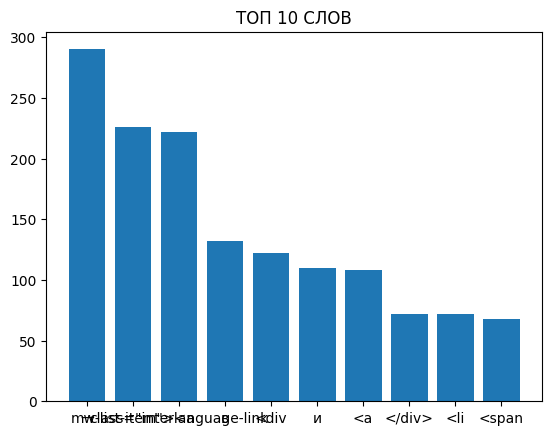

In [1]:
!pip install scrapy

import scrapy
from scrapy.utils.project import get_project_settings
from scrapy.crawler import CrawlerRunner
from twisted.internet import reactor

class MySpider(scrapy.Spider):
    name = 'myspider'
    start_urls = ['https://ru.wikipedia.org/wiki/Дельфины']

    def parse(self, response):
        data = {
            'url': response.url,
            'title': response.css('title::text').get(),
            'content': response.css('body').get(),
        }
        yield data

# Настройки для экспорта в CSV
settings = get_project_settings()
settings.set('FEEDS', {
    'output.csv': {'format': 'csv'},
})

# Создаем CrawlerRunner (Crawler поисковый робот, используемый поисковой системой для обнаружения новых страниц в интернет)
runner = CrawlerRunner(settings)

# Запускаем паука
d = runner.crawl(MySpider)

# Добавляем колбэк для остановки реактора после завершения
d.addBoth(lambda _: reactor.stop())

# Запускаем реактор
reactor.run()

print("ФАЙЛ:")
!cat output.csv

import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('output.csv')

# Пример анализа: подсчет частоты слов
from collections import Counter
words = ' '.join(df['content']).split()
word_counts = Counter(words)
print("ТОП 10 СЛОВ:")
print(word_counts.most_common(10))

# Визуализация
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('ТОП 10 СЛОВ')
plt.show()

* В идеалееред анализом нужно очищать content от HTML и JS (BeautifulSoup, parsel) для извлечения чистого текст